Neural Networks from Scratch
Inputs, Weights and Biases

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#Coding a Layer with 3 neurons
inputs = [1.1,2.3,3.8]
weights = [[0.5,0.4,0.6],        #weights of first neuron
           [0.8,0.1,0.3],        #weights of second neuron
           [0.5,0.6,0.2]]       #weights of third neuron
biases = [1,2,3]
output = []
for layer_weight,layer_bias in zip(weights,biases):
    neuron_output = 0
    for n_inputs,n_weights in zip(inputs,layer_weight):
        neuron_output += n_inputs * n_weights
    neuron_output += layer_bias
    output.append(neuron_output)
print(output)
    


[4.75, 4.25, 5.6899999999999995]


In [29]:
#np.shape

#List in Python => 1D Array in Numpy => Vectors in Maths

list = [1,2,3,4]            #list.shape = (4,)
print(np.shape(list))

#List of List in Python => 2D Array in Numpy => Matrices in Maths 
lol = [[1,2,3,4],
       [1,2,3,4] ]          #lol.shape = (2,4)
print(np.shape(lol))

#List of LOL in Python => 3D Array in Numpy.
lol2 = [
        [[1,2,3,4],[1,2,3,4],[5,7,8,4]],
        [[5,7,9,3],[1,5,0,4],[8,9,4,3]]
       ]                    #lol2.shape = (2,3,4)
print(np.shape(lol2))

(4,)
(2, 4)
(2, 3, 4)


In [30]:
#Dot Product 
# a.b = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]
# a.b = b.a since both 'a' and 'b' are vectors.

output = []
for layer_weights,layer_bias in zip(weights,biases):
    layer_output = np.dot(layer_weights,inputs)     #Dot Product of two vectors
    layer_output += layer_bias
    output.append(layer_output)
print(output)

# More simplified code with dot function between matrix and a vector. Here the order is very important.
# The weights have a shape of (2,4) and inputs have a shape of (4,). Only dot(weights,inputs) will make sense to get correct output

#Dot Product of a Matrix and a Vector
output2 = np.dot(weights,inputs) + biases
#output2 = [np.dot(weights[0],inputs), np.dot(weights[1],inputs) ,np.dot(weights[2],inputs)] + biases
#The output2 is in the form of Numpy NDArray
print(output2)
    

[4.75, 4.25, 5.6899999999999995]
[4.75 4.25 5.69]


In [31]:
#Multiple Inputs

inputs = [[1.1,2.3,3.8,5],
          [3,6,7,5],
          [4,6,7,9]]
weights = [[0.5,0.4,0.6,0.7],        #weights of first neuron
           [0.8,0.1,0.3,0.4],        #weights of second neuron
           [0.5,0.6,0.2,-0.9]]       #weights of third neuron
biases = [1,2,3]

'''output = np.dot(weights,inputs) + biases. This wont work since the dimensions dont match weights have dimension (3,4) and 
inputs also have a similar dimension (3,4) so matrix multiplication is not possible.
Matrix Multiplication is nothing but the dot product between each row of the weight matrix with each column of the input matrix.
Hence we take transpose of the weight matrix to match the dimension and calculation  '''
'''inputs =[1.1 2.3 3.8 8.5      weights = [0.5  0.4  0.6  0.7    weights.T = [0.5  0.8  0.5  
            3   6    7   5                  0.8  0.1  0.3  0.4                 0.4  0.1  0.6     
            4   6    7   9]                 0.5  0.6  0.2  -0.9]               0.6  0.3  0.2
                                                                               0.7  0.4  -0.9]'''

#Dot Product of two matrices
print(np.array(weights).T)
output = np.dot(inputs,np.array(weights).T)

print(output)

[[ 0.5  0.8  0.5]
 [ 0.4  0.1  0.6]
 [ 0.6  0.3  0.2]
 [ 0.7  0.4 -0.9]]
[[ 7.25  4.25 -1.81]
 [11.6   7.1   2.  ]
 [14.9   9.5  -1.1 ]]


In [12]:
#Building Layers
class DenseLayers:
    def __init__(self,layerinputs,layeroutputs):
        self.weights = np.random.randn(layerinputs,layeroutputs)
        self.biases = np.random.random((1,layeroutputs))
# Note in the above function randn takes the each dimension of the weight matrix as parameter but 
# random.random  takes the dimension tuple together as the first parameter 
    def forward(self,inputs):
        self.outputs = np.dot(inputs,self.weights) + self.biases

In [33]:
layer1 = DenseLayers(4,5)
layer2 = DenseLayers(5,2)
layer1.forward(inputs)
layer2.forward(layer1.outputs)
print(" The layer1 output is \n",layer1.outputs)
print(" The layer2 output is \n",layer2.outputs)

 The layer1 output is 
 [[  2.23671888  -1.56871618  -9.74026894  -8.27290792   3.07718819]
 [  4.97952433   3.00720201 -12.25453172 -15.41545247   3.70258742]
 [  5.88107563  -1.56580462 -18.7234172  -17.10118899   4.07255248]]
 The layer2 output is 
 [[-18.6049357   -9.38455983]
 [-21.39126314  -2.43822662]
 [-33.96619298 -13.72065583]]


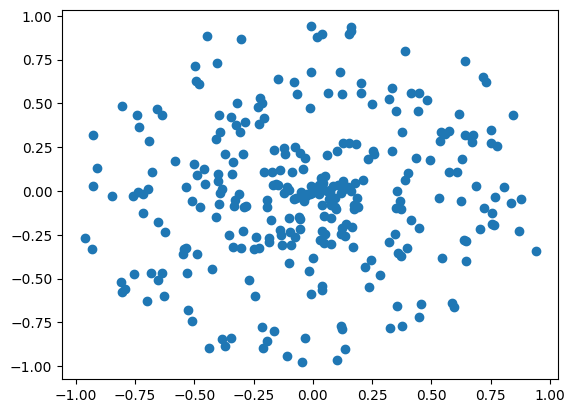

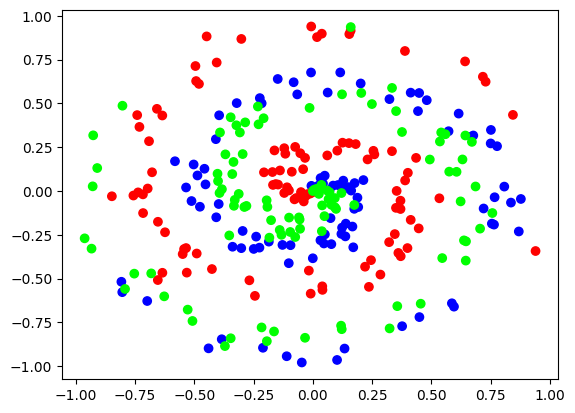

In [34]:
#Create Data Function
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X,y = spiral_data(100,3)
plt.scatter(X[:,0],X[:,1]) # For the plot x takes values from index 0 and y takes value from the index 1
plt.show()

plt.scatter(X[:,0],X[:,1],c=y,cmap='brg') # For the plot x takes values from index 0 and y takes value from the index 1. 
#The c=y signifies the colouring is done based on the y values
plt.show()

ACTIVATION FUNCTION

Activation Functions add a non linear component to the neural networks. 
1. ReLU
2. Softmax

Reference: https://www.youtube.com/watch?v=gmjzbpSVY1A

In [10]:
#Example for axis andm keepdims attributes
layer = [[4.3, 8, 9],
         [3,2,1],
         [0.9,0.8,0.3]]
expV = np.exp(layer)
#norm = np.sum(expV)
norm = np.sum(expV,axis=1)
print(type(norm))
print(np.shape(norm))
print(norm)

norm_base= np.sum(expV, axis = 1, keepdims=True)
print(type(norm_base))
print(np.shape(norm_base))
print(norm_base)

NameError: name 'np' is not defined

In [13]:
class ReLUActivation:
    def forward(self,inputs):
        self.outputs = np.maximum(0,inputs) 
        # the max function iin python is used for scalar values while np.maximum can be used in vector values
        return self.outputs

class SoftMaxActivation:
    def forward(self,inputs):
        #expValues = np.exp(inputs).We normalise the exp valuesas the exp values can reach a very large numbers very quickly causing an overflow.
        #So we normalize the inputs by subtracting from the max value of each sample.
        expValues = np.exp(inputs - np.max(inputs, axis =1, keepdims=True))
        self.outputs = expValues / np.sum(expValues, axis=1,keepdims=True)
        # The sum over the expValues should be done row wise (over values of each input sample) and axis = 1 does it row wise and axis =0 does it columnwise. 
        # While axis = None which is the default results in a scalar value with sum over all the expValues
        # The keepdims true keeps it as a (1,1) matrix instead of an np.array (1,) that is the default output.
        return self.outputs

layer1 = DenseLayers(2,5)
layer1.forward(X)
ActivationLayer1 = ReLUActivation()
layer1Output = ActivationLayer1.forward(layer1.outputs)
print("The output of the ReLU layer is \n",layer1Output)
layer2 = DenseLayers(5,3) # 5 Inputs from the previous layer's output
layer2.forward(layer1.outputs)
ActivationLayer2 = SoftMaxActivation()
layer2Output = ActivationLayer2.forward(layer2.outputs)
print("The output of the Softmax layer is \n",layer2Output)
#The maximum value of the layer2Output for each instance is the class of that instance (maximum probability)


The output of the ReLU layer is 
 [[0.39376986 0.82150046 0.         0.61595211 0.1534532 ]
 [0.38039602 1.08524742 0.         0.47993237 0.21245769]
 [0.3984186  0.96665077 0.         0.54610192 0.1530716 ]
 ...
 [0.03104954 0.96477657 0.         0.39386354 1.1579653 ]
 [0.07821221 1.16651282 0.         0.31375221 1.04608286]
 [0.09091218 0.94500093 0.         0.42860239 0.99251158]]
The output of the Softmax layer is 
 [[0.25901031 0.55025552 0.19073417]
 [0.36890611 0.37661079 0.2544831 ]
 [0.32177081 0.45380681 0.22442237]
 [0.26700097 0.5610648  0.17193423]
 [0.27023006 0.52586864 0.20390129]
 [0.24875855 0.5725685  0.17867295]
 [0.36876317 0.39323188 0.23800495]
 [0.27657828 0.52280326 0.20061846]
 [0.34487938 0.42088812 0.2342325 ]
 [0.40268065 0.32097991 0.27633944]
 [0.29953432 0.47145006 0.22901562]
 [0.29500926 0.45934106 0.24564968]
 [0.31317124 0.4628493  0.22397945]
 [0.29035903 0.48198695 0.22765402]
 [0.35304918 0.40304224 0.24390858]
 [0.25579296 0.55208483 0.19212221]

Loss Functions
How should a Loss Function be defined?

1. Categorical Loss Function == Negative Log Likelihood

In [14]:
#Example for np.array Functionalities - A np.array can be indexed by its indicies.
layer_array = np.array(layer) #Converting a List to np.array
print ('the layer array is \n', layer_array)

""" Now if we are interested in say the first, second and second index values of the first second and third rows
layer_outputs = layer_array[[0,1,2],[0,1,1]]. The first index value [0,1,2] representing the length of the layer_array 
can be represented as range(len(layer_array)) = [0,1,2]  """

layer_outputs = layer_array[range(len(layer_array)),[0,1,1]]
print('the specific values are', layer_outputs)

the layer array is 
 [[4.3 8.  9. ]
 [3.  2.  1. ]
 [0.9 0.8 0.3]]
the specific values are [4.3 2.  0.8]


In [15]:
#Calculating the negative log likelihood
#We can use the softmax outputs from the previous step and use a true class y for each instance as a one hot encoded vector and calculate the loss.
# Loss = negative Liig likelihood

class Loss:
    def calculate(self,yPred,yTrue):
        sampleLoss = self.lossCalc(yPred,yTrue)
        totalLoss = np.mean(sampleLoss)
        return totalLoss
    
class CategoricalCrossEntropy(Loss):
    def lossCalc(self,yPred,yTrue):
        # We clip the predicted probabilities because if we have the predicted probability of a true class to be 0 then the error will be infinitY. 
        # Although this is correct, infinity would pose a problem with further arithmetic calculations like mean.
        # So we clip the probabilities between 1e-7 which is very close to 0 and not exactly 0 to 1-1e-7 which is close to 1 and not exactly 1.
        yPredClipped = np.clip(yPred, 1e-7,1-1e-7)
        #If ytrue is a scalar value representing the true class. We extract the predicted probabilities of the true class
        if len(yTrue.shape) == 1:
           predictedProb = yPredClipped[range(len(yPredClipped)),yTrue]
        #If yTrue is a One Hot Encoded vector. We need to extract the predicted probabilities only whuere there is a 1 in the true y vector.
        elif len(yTrue.shape) == 2:
           predictedProb = np.sum(yPredClipped * yTrue, axis = 1)
        
        negativeLogLikelihood = -np.log(predictedProb)
        return negativeLogLikelihood

class Accuracy:
    def calculate(self,yPred,yTrue):
        predictedClassIndex = np.argmax(yPred,axis=1)
        #If yTrue is a vector scalar values of true classes
        accuracy = np.mean(predictedClassIndex == yTrue)
        print("Accuracy ", accuracy)

lossValue = CategoricalCrossEntropy() 
modelLoss = lossValue.calculate(layer2Output,y)
print("The model Loss is ", modelLoss)
modelAccuracy = Accuracy()
modelAccuracy.calculate(layer2Output,y)



The model Loss is  1.0447586855476279
Accuracy  0.44666666666666666


Optimisation

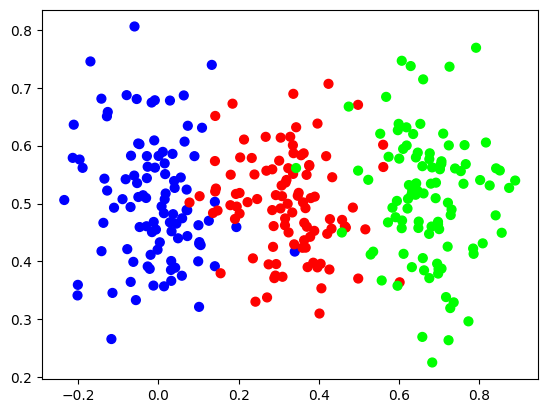

In [5]:
#Getting data from nnfs book
import nnfs             
from nnfs.datasets import vertical_data
import matplotlib.pyplot as plt

X,y = vertical_data(samples=100,classes =3)

plt.scatter(X[:,0], X[:,1], c=y,s=40,cmap='brg')
plt.show()

In [20]:
#Finding a seperating line among these three classes of data

#Designing the neural Network Layers
layer1 = DenseLayers(2,3)
actLayer1 = ReLUActivation()
layer2 = DenseLayers(3,3)
actLayer2 = SoftMaxActivation()


#Forward Pass through the network
layer1.forward(X)
layer1Out = actLayer1.forward(layer1.outputs)
layer2.forward(layer1Out)
yPredicted = actLayer2.forward(layer2.outputs)

#Calculating the Loss
loss = CategoricalCrossEntropy()
calcLoss = loss.calculate(yPredicted,y)
#print("The calculated loss in 1st iteration is ", calcLoss)

#Optimising the prediction using random search of weights
optimizedLoss = 9999
for iteration in range (1000):
    if calcLoss < optimizedLoss:
        optimizedLoss = calcLoss
        optimizedWeights1 = [[layer1.biases],[layer1.weights]]
        optimizedWeights2 = [[layer2.biases],[layer2.weights]]
        print('The optimized loss ', optimizedLoss, ' in iteration:', iteration)
        print('The optimized weights are: \n', optimizedWeights1, optimizedWeights2)

    layer1.weights = np.random.randn(X.shape[1],3)
    layer1.biases = np.random.random((1,3))
    layer2.weights = np.random.randn(3,3)
    layer2.biases = np.random.random((1,3))
    layer1.forward(X)
    layer1Out = actLayer1.forward(layer1.outputs)
    layer2.forward(layer1Out)
    yPredicted = actLayer2.forward(layer2.outputs)
    loss = CategoricalCrossEntropy()
    calcLoss = loss.calculate(yPredicted,y)



The optimized loss  1.0832567809070768  in iteration: 0
The optimized weights are: 
 [[array([[0.45981039, 0.14685874, 0.855683  ]])], [array([[ 0.95470831,  1.32745832, -3.55268354],
       [-1.85836184,  0.23023621, -0.14138734]])]] [[array([[0.08580974, 0.89731923, 0.61972646]])], [array([[-0.57169542, -0.93149731, -1.38733693],
       [ 0.5406539 , -0.21496592,  0.98541578],
       [ 0.54893338,  0.68205678, -0.11520797]])]]
The optimized loss  1.0638473898844047  in iteration: 17
The optimized weights are: 
 [[array([[0.2138    , 0.70940999, 0.51670947]])], [array([[ 3.195575  ,  0.28013715, -0.62129572],
       [-0.02726188, -0.43696793, -1.48738184]])]] [[array([[0.47120798, 0.83177817, 0.29479646]])], [array([[-0.90094817, -0.1712878 , -0.04871184],
       [-1.29190992, -0.34006267, -0.86716439],
       [ 0.60300125, -0.26522103,  0.97684682]])]]
The optimized loss  1.0573965801498426  in iteration: 30
The optimized weights are: 
 [[array([[0.56524757, 0.40512986, 0.71698601]])

In [41]:
#Optimising  by randomly modifying the weights and biases towards reducing the loss
#Designing the neural Network Layers
layer1 = DenseLayers(2,3)
actLayer1 = ReLUActivation()
layer2 = DenseLayers(3,3)
actLayer2 = SoftMaxActivation()


#Forward Pass through the network
layer1.forward(X)
layer1Out = actLayer1.forward(layer1.outputs)
layer2.forward(layer1Out)
yPredicted = actLayer2.forward(layer2.outputs)

#Calculating the Loss
loss = CategoricalCrossEntropy()
calcLoss = loss.calculate(yPredicted,y)
#print("The calculated loss in 1st iteration is ", calcLoss)

optimizedLoss = 9999
for iteration in range (1000):
    if calcLoss < optimizedLoss:
        optimizedLoss = calcLoss
        optimizedWeights1 = layer1.weights.copy()
        optimizedBiases1 = layer1.biases.copy()
        optimizedWeights2 = layer2.weights.copy()
        optimizedBiases2 = layer2.biases.copy()
        print('The optimized loss ', optimizedLoss, ' in iteration:', iteration)
    else:
        layer1.weights = optimizedWeights1.copy()
        layer2.weights = optimizedWeights2.copy()
        layer1.biases = optimizedBiases1.copy()
        layer2.biases = optimizedBiases2.copy()

    layer1.weights += 0.05*np.random.randn(X.shape[1],3)
    layer1.biases += 0.05*np.random.random((1,3))
    layer2.weights += 0.05*np.random.randn(3,3)
    layer2.biases += 0.05*np.random.random((1,3))
    layer1.forward(X)
    layer1Out = actLayer1.forward(layer1.outputs)
    layer2.forward(layer1Out)
    yPredicted = actLayer2.forward(layer2.outputs)
    loss = CategoricalCrossEntropy()
    calcLoss = loss.calculate(yPredicted,y)



The optimized loss  1.7089426597598567  in iteration: 0
The optimized loss  1.6981727725222018  in iteration: 2
The optimized loss  1.675968088454598  in iteration: 4
The optimized loss  1.6161031592191546  in iteration: 5
The optimized loss  1.6075053295820934  in iteration: 8
The optimized loss  1.5923155077537137  in iteration: 12
The optimized loss  1.5845148330348522  in iteration: 24
The optimized loss  1.56872478032788  in iteration: 30
The optimized loss  1.5678726371237877  in iteration: 33
The optimized loss  1.5482440561905069  in iteration: 35
The optimized loss  1.516034200906312  in iteration: 37
The optimized loss  1.5108300590309995  in iteration: 38
The optimized loss  1.5085964319603564  in iteration: 40
The optimized loss  1.4717470013497094  in iteration: 42
The optimized loss  1.4548145924434739  in iteration: 43
The optimized loss  1.4251740984505235  in iteration: 45
The optimized loss  1.4022936047895054  in iteration: 48
The optimized loss  1.3910287095874847  

In [ ]:
Moving to Derivatives.

Motivation:
1. Above is a small problem of finding a linear seprating function of which the weights form the slope and the biases form the intercept. 
But for solving a little more complex problem like finding a seperating plane in a spiral dataset requires a non-linear seperating function 
and just randomly searching for weights and biases will not help us converge to the optimum model.

2. We may be stuck at the local minimum of the function. And in this solution we treat all weights and biases equally but 
in reality some input features may be more influential than others and require large weights than other input features.

Inorder to understand the influence of each input feature we can use the slope.
Eg.1 y = 2*x. Here the output is double the input x.
Eg.2 y = 2x^2. Here the impact of x on y is not straight forward. The slope between to different pair of points of the function result in different solpes.
Hence we use a tangent line to solve this problem. 
We find the slope between a point and another point at a infinitesimal close distance to the considered point. 
This gives us the slope of the line. We calculate  such tangent (instantenous slopes) at various points. This is called numerical differentiation.

Numerical Differentiation is approximation of analytical differentiation. Fom the below plot we can see that the tangent lines approximate the function to a certain extent and 
slopes and the intercepts of these lines become the weights and biases of that input sample in the model. 
We use these weights and biases for each sample in each neruon calculate the yPredicted and then calcualte the loss...

where samll delta is the delta loss?

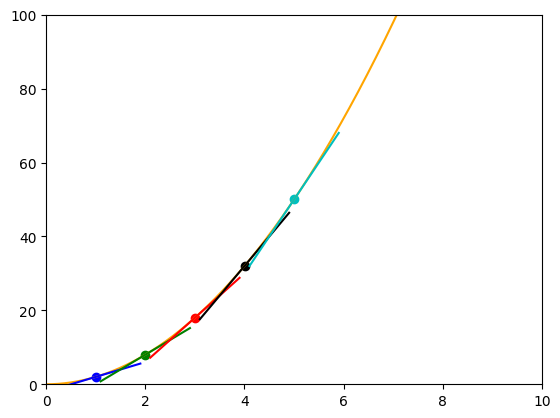

In [67]:
#Numerical Differentiation
def f(x):
    return 2*(x**2)

x = np.arange(0,50,0.001)
y = f(x)

color = ['b','g','r','k','c']
plt.plot(x,y,c= 'orange')
# Infinitesimal close point to x
for i in range(1,6):
    x = i
    x1 = i + 0.0001
    y = f(x)
    y1  = f(x1)
#Calcuating the instantaneous slope
    approx_derivative = (y1 - y) / (x1 - x)
#Calculating the bias as the intercept of the equation y = mx +b => b = y-mx.
    b = y - approx_derivative * x

    def approximate_tangent_line(x,m,b):
        return m*x + b
    plt.xlim(0,10) # Setting the x_axis scale
    plt.ylim(0,100) #Setting the y_axis scale
    plt.scatter(x1,y1,c=color[i-1])
    pointsOnTangentLine = []
    for point in [x1-0.9,x1,x1+0.9]:
        pointsOnTangentLine. append(approximate_tangent_line(point,approx_derivative,b))
    plt. plot([x1-0.9,x1,x1+0.9],pointsOnTangentLine, c= color[i-1])


In [ ]:
From Numerical Differentiation To Analytical Differentiation
 
We did the numerical differentiation where output depended only on a single input but in reality a neural network problem may have several input parameters (features) for each input sample.

In that case we need to find the instantenous slope (tangent lines) for each each feature (above problem had only one feature x) in every sample (in above problem we considered only 5 points). 
This has to be done for all layers to find the weights and biases. This is a very expensive calculation.

